In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
from google.colab import files

# Upload the file manually
uploaded = files.upload()

# Load the dataset
import pandas as pd
df = pd.read_csv('accident_train.csv')

# Verify the data
print(df.head())
print(df.info())



Saving accident_train.csv to accident_train (1).csv
   Unnamed: 0  Severity  Start_Lat   Start_Lng  Temperature(F)  Wind_Chill(F)  \
0     7133276         1  26.706900  -80.119360            78.0           78.0   
1     5363845         2  38.781024 -121.265820            55.0           55.0   
2      155993         3  33.985249  -84.269348            91.0            NaN   
3     1861414         3  47.118706 -122.556908            67.0           67.0   
4     2021359         2  33.451355 -111.890343            95.0           95.0   

   Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  ...  \
0         81.0         30.13            10.0            ESE  ...   
1         88.0         29.83            10.0            SSE  ...   
2         47.0         29.91            10.0          South  ...   
3         84.0         29.78            10.0            WNW  ...   
4         16.0         28.53            10.0            WSW  ...   

   Precipitation(in)  Weather_Condition Amenity   Bu

In [ ]:
# Step 3: Handle missing values (optional)
df = df.fillna(method='ffill')  # Forward fill, or use a strategy suitable for your dataset


<ipython-input-5-25bba12091ed>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill, or use a strategy suitable for your dataset


In [ ]:
# Step 4: Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [ ]:
print(df.columns)
print(df.head())



Index(['Unnamed: 0', 'Severity', 'Start_Lat', 'Start_Lng', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Junction',
       'Station', 'Stop', 'Traffic_Signal', 'Sunrise_Sunset'],
      dtype='object')
   Unnamed: 0  Severity  Start_Lat   Start_Lng  Temperature(F)  Wind_Chill(F)  \
0     7133276         1  26.706900  -80.119360            78.0           78.0   
1     5363845         2  38.781024 -121.265820            55.0           55.0   
2      155993         3  33.985249  -84.269348            91.0           55.0   
3     1861414         3  47.118706 -122.556908            67.0           67.0   
4     2021359         2  33.451355 -111.890343            95.0           95.0   

   Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Direction  ...  \
0         81.0         30.13            10.0               4  ...   
1   

In [ ]:
# Define features and target
X = df.drop('Severity', axis=1)  # Drop the target column to use all other columns as features
y = df['Severity']  # Target variable

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (100000, 20)
Target shape: (100000,)


In [ ]:
X = df.drop(['Severity', 'Unnamed: 0'], axis=1)


In [ ]:
# Step 6: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 7: Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.80545
              precision    recall  f1-score   support

           1       0.25      0.01      0.01       167
           2       0.82      0.98      0.89     16007
           3       0.55      0.14      0.22      3275
           4       0.27      0.01      0.01       551

    accuracy                           0.81     20000
   macro avg       0.47      0.28      0.28     20000
weighted avg       0.75      0.81      0.75     20000



In [ ]:
# Step 9: Display feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))


Start_Lng            0.157315
Start_Lat            0.151761
Pressure(in)         0.118672
Wind_Chill(F)        0.101962
Humidity(%)          0.101654
Temperature(F)       0.098340
Wind_Speed(mph)      0.076677
Wind_Direction       0.076182
Visibility(mi)       0.027146
Weather_Condition    0.022164
Precipitation(in)    0.017412
Sunrise_Sunset       0.014874
Junction             0.010035
Traffic_Signal       0.009654
Crossing             0.008451
Stop                 0.003713
Station              0.002498
Amenity              0.001436
Bump                 0.000055
dtype: float64


              Feature  Importance
1           Start_Lng    0.157315
0           Start_Lat    0.151761
5        Pressure(in)    0.118672
3       Wind_Chill(F)    0.101962
4         Humidity(%)    0.101654
2      Temperature(F)    0.098340
8     Wind_Speed(mph)    0.076677
7      Wind_Direction    0.076182
6      Visibility(mi)    0.027146
10  Weather_Condition    0.022164
9   Precipitation(in)    0.017412
18     Sunrise_Sunset    0.014874
14           Junction    0.010035
17     Traffic_Signal    0.009654
13           Crossing    0.008451
16               Stop    0.003713
15            Station    0.002498
11            Amenity    0.001436
12               Bump    0.000055


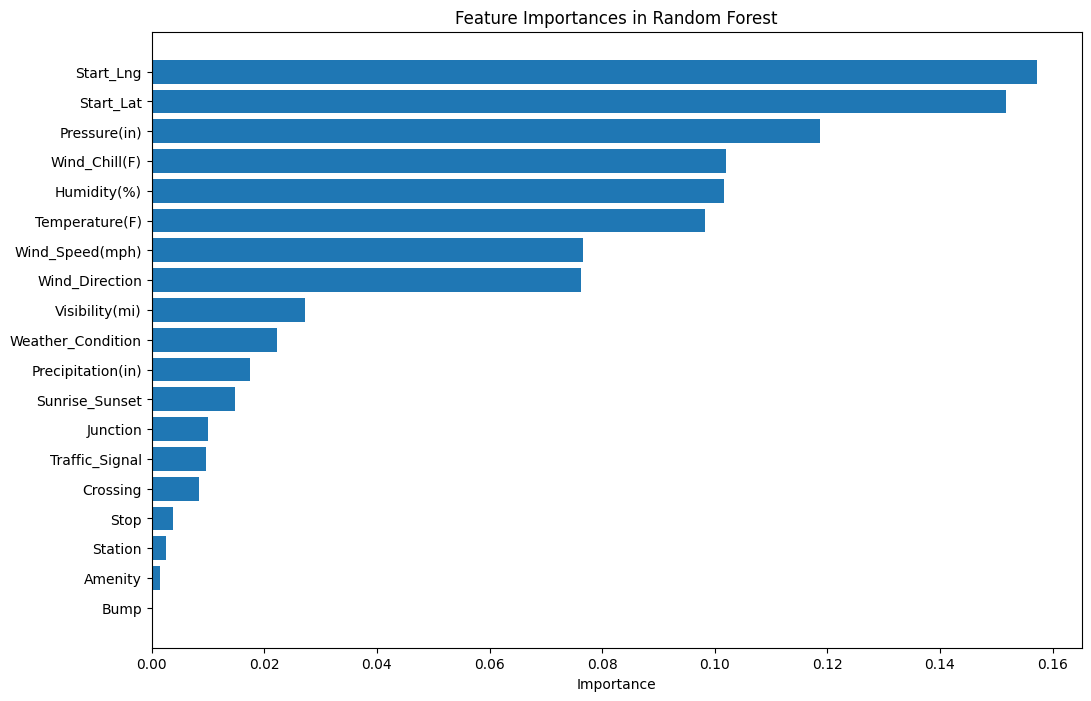

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
feature_importances = rf_model.feature_importances_

# Create a DataFrame to map features to their importance
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print(features_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances in Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [19]:
y_pred = rf_model.predict(X_test)


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.80545
Confusion Matrix:
[[    1   166     0     0]
 [    3 15651   346     7]
 [    0  2820   454     1]
 [    0   522    26     3]]
Classification Report:
              precision    recall  f1-score   support

           1       0.25      0.01      0.01       167
           2       0.82      0.98      0.89     16007
           3       0.55      0.14      0.22      3275
           4       0.27      0.01      0.01       551

    accuracy                           0.81     20000
   macro avg       0.47      0.28      0.28     20000
weighted avg       0.75      0.81      0.75     20000



In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have already processed your data and defined X_train, y_train, X_test, and y_test

# Step 1: Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 3: Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.80545


In [24]:
y_pred = rf_model.predict(X_test)



In [25]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.80545


In [13]:
print(X_train.shape)
print(y_train.shape)


(80000, 20)
(80000,)


In [14]:
print(X_train.dtypes)


Unnamed: 0             int64
Start_Lat            float64
Start_Lng            float64
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction        object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
Amenity                 bool
Bump                    bool
Crossing                bool
Junction                bool
Station                 bool
Stop                    bool
Traffic_Signal          bool
Sunrise_Sunset       float64
dtype: object


In [15]:
X_train = pd.get_dummies(X_train)


In [16]:
print(X_train.dtypes)


Unnamed: 0                                 int64
Start_Lat                                float64
Start_Lng                                float64
Temperature(F)                           float64
Wind_Chill(F)                            float64
Humidity(%)                              float64
Pressure(in)                             float64
Visibility(mi)                           float64
Wind_Speed(mph)                          float64
Precipitation(in)                        float64
Amenity                                     bool
Bump                                        bool
Crossing                                    bool
Junction                                    bool
Station                                     bool
Stop                                        bool
Traffic_Signal                              bool
Sunrise_Sunset                           float64
Wind_Direction_CALM                         bool
Wind_Direction_Calm                         bool
Wind_Direction_E    

In [17]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())


Unnamed: 0                                   0
Start_Lat                                    0
Start_Lng                                    0
Temperature(F)                            1682
Wind_Chill(F)                            20756
Humidity(%)                               1801
Pressure(in)                              1442
Visibility(mi)                            1774
Wind_Speed(mph)                           5939
Precipitation(in)                        22944
Amenity                                      0
Bump                                         0
Crossing                                     0
Junction                                     0
Station                                      0
Stop                                         0
Traffic_Signal                               0
Sunrise_Sunset                             258
Wind_Direction_CALM                          0
Wind_Direction_Calm                          0
Wind_Direction_E                             0
Wind_Directio

In [18]:
X_train = X_train.fillna(0)  # or use another strategy like mean imputation
y_train = y_train.fillna(y_train.mean())


In [19]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())

Unnamed: 0                               0
Start_Lat                                0
Start_Lng                                0
Temperature(F)                           0
Wind_Chill(F)                            0
Humidity(%)                              0
Pressure(in)                             0
Visibility(mi)                           0
Wind_Speed(mph)                          0
Precipitation(in)                        0
Amenity                                  0
Bump                                     0
Crossing                                 0
Junction                                 0
Station                                  0
Stop                                     0
Traffic_Signal                           0
Sunrise_Sunset                           0
Wind_Direction_CALM                      0
Wind_Direction_Calm                      0
Wind_Direction_E                         0
Wind_Direction_ENE                       0
Wind_Direction_ESE                       0
Wind_Direct

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [30]:
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('accident_train.csv')

# Prepare the data
X = df.drop('Severity', axis=1)  # Features
y = df['Severity']  # Target variable

# Handle categorical features (one-hot encoding)
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Ensure X_test has the same columns as X_train (fill missing columns with 0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Additional metrics (e.g., precision, recall, etc.)
print(classification_report(y_test, y_pred))



Saving accident_train.csv to accident_train (3).csv
Accuracy: 82.58%
              precision    recall  f1-score   support

           1       0.60      0.23      0.33       167
           2       0.84      0.96      0.90     16007
           3       0.64      0.32      0.43      3275
           4       0.41      0.02      0.03       551

    accuracy                           0.83     20000
   macro avg       0.62      0.38      0.42     20000
weighted avg       0.80      0.83      0.79     20000



In [31]:
import random
import pandas as pd

# Function to generate random input (same as before)
def generate_random_input():
    random_input = {
        'Temperature(F)': random.uniform(-30, 110),
        'Wind_Chill(F)': random.uniform(-50, 100),
        'Humidity(%)': random.randint(0, 100),
        'Pressure(in)': random.uniform(28, 31),
        'Visibility(mi)': random.uniform(1, 20),
        'Wind_Speed(mph)': random.uniform(0, 60),
        'Precipitation(in)': random.uniform(0, 1),
        'Amenity': random.choice([0, 1]),
        'Bump': random.choice([0, 1]),
        'Crossing': random.choice([0, 1]),
        'Junction': random.choice([0, 1]),
        'Station': random.choice([0, 1]),
        'Stop': random.choice([0, 1]),
        'Traffic_Signal': random.choice([0, 1]),
        'Sunrise_Sunset': random.choice(['Day', 'Night']),
        'Wind_Direction_CALM': random.choice([0, 1]),
        'Wind_Direction_Calm': random.choice([0, 1]),
        'Wind_Direction_E': random.choice([0, 1]),
        'Wind_Direction_ENE': random.choice([0, 1]),
        'Wind_Direction_ESE': random.choice([0, 1]),
        'Wind_Direction_East': random.choice([0, 1]),
        'Wind_Direction_N': random.choice([0, 1]),
        'Wind_Direction_NE': random.choice([0, 1]),
        'Wind_Direction_NNE': random.choice([0, 1]),
        'Wind_Direction_NNW': random.choice([0, 1]),
        'Wind_Direction_NW': random.choice([0, 1]),
        'Wind_Direction_North': random.choice([0, 1]),
        'Wind_Direction_S': random.choice([0, 1]),
        'Wind_Direction_SE': random.choice([0, 1]),
        'Wind_Direction_SSE': random.choice([0, 1]),
        'Wind_Direction_SSW': random.choice([0, 1]),
        'Wind_Direction_SW': random.choice([0, 1]),
        'Wind_Direction_South': random.choice([0, 1]),
        'Wind_Direction_VAR': random.choice([0, 1]),
        'Wind_Direction_Variable': random.choice([0, 1]),
        'Wind_Direction_W': random.choice([0, 1]),
        'Wind_Direction_WNW': random.choice([0, 1]),
        'Wind_Direction_WSW': random.choice([0, 1]),
        'Wind_Direction_West': random.choice([0, 1]),
        'Weather_Condition_Clear': random.choice([0, 1]),
        'Weather_Condition_Cloudy': random.choice([0, 1]),
        'Weather_Condition_Fog': random.choice([0, 1]),
        'Weather_Condition_Freezing Conditions': random.choice([0, 1]),
        'Weather_Condition_Rain': random.choice([0, 1]),
        'Weather_Condition_Snow': random.choice([0, 1]),
        'Weather_Condition_Thunderstorm': random.choice([0, 1]),
        'Weather_Condition_Unknown': random.choice([0, 1])
    }

    if random.random() < 0.33:  # 33% chance for "Light"
        random_input['Temperature(F)'] = random.uniform(70, 100)
        random_input['Precipitation(in)'] = random.uniform(0, 0.1)
        random_input['Wind_Speed(mph)'] = random.uniform(0, 20)
    elif random.random() < 0.66:  # 33% chance for "Moderate"
        random_input['Temperature(F)'] = random.uniform(50, 80)
        random_input['Precipitation(in)'] = random.uniform(0.1, 0.3)
        random_input['Wind_Speed(mph)'] = random.uniform(20, 40)
    else:  # 33% chance for "Severe"
        random_input['Temperature(F)'] = random.uniform(30, 50)
        random_input['Precipitation(in)'] = random.uniform(0.5, 1)
        random_input['Wind_Speed(mph)'] = random.uniform(40, 60)

    return random_input

# Function to preprocess input data
def preprocess_input(input_data):
    input_df = pd.DataFrame([input_data])
    input_df = pd.get_dummies(input_df)
    input_df = input_df.reindex(columns=X_train.columns, fill_value=0)
    return input_df

# Function to predict severity
def predict_severity(input_data):
    preprocessed_data = preprocess_input(input_data)
    prediction = rf_model.predict(preprocessed_data)
    severity_map = {1: 'Light', 2: 'Moderate', 3: 'Severe'}
    severity = severity_map.get(prediction[0], 'Unknown')
    return severity

# Generate a random input and predict the severity
for i in range(5):  # Predict 5 times with different random inputs
    random_input = generate_random_input()  # Generate a random input
    predicted_severity = predict_severity(random_input)  # Predict the severity
    print(f"Random Input {i+1}: {random_input}")
    print(f"Predicted Severity: {predicted_severity}\n")


Random Input 1: {'Temperature(F)': 70.44349725367037, 'Wind_Chill(F)': 21.66706324405301, 'Humidity(%)': 9, 'Pressure(in)': 29.729043607607103, 'Visibility(mi)': 15.5014709390519, 'Wind_Speed(mph)': 13.792986339558253, 'Precipitation(in)': 0.005193989302757152, 'Amenity': 1, 'Bump': 1, 'Crossing': 0, 'Junction': 0, 'Station': 0, 'Stop': 0, 'Traffic_Signal': 0, 'Sunrise_Sunset': 'Day', 'Wind_Direction_CALM': 0, 'Wind_Direction_Calm': 0, 'Wind_Direction_E': 1, 'Wind_Direction_ENE': 0, 'Wind_Direction_ESE': 0, 'Wind_Direction_East': 1, 'Wind_Direction_N': 0, 'Wind_Direction_NE': 1, 'Wind_Direction_NNE': 0, 'Wind_Direction_NNW': 0, 'Wind_Direction_NW': 0, 'Wind_Direction_North': 0, 'Wind_Direction_S': 1, 'Wind_Direction_SE': 0, 'Wind_Direction_SSE': 0, 'Wind_Direction_SSW': 0, 'Wind_Direction_SW': 0, 'Wind_Direction_South': 0, 'Wind_Direction_VAR': 1, 'Wind_Direction_Variable': 1, 'Wind_Direction_W': 0, 'Wind_Direction_WNW': 0, 'Wind_Direction_WSW': 1, 'Wind_Direction_West': 1, 'Weather_Co

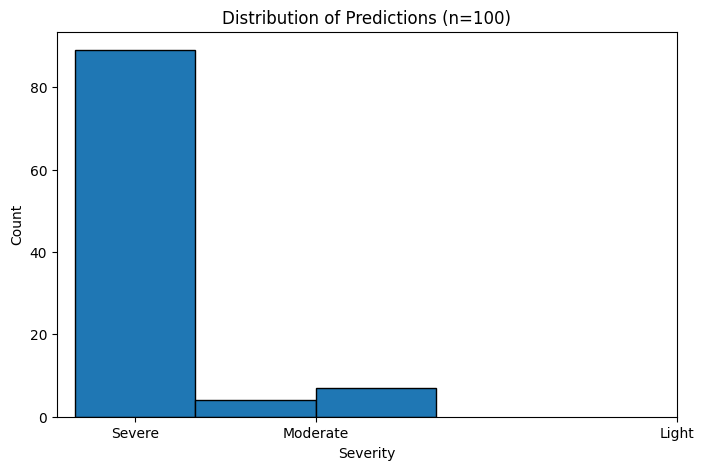

In [36]:
import matplotlib.pyplot as plt

# Function to predict multiple times and collect results
def predict_multiple_times(num_predictions=100):
    predictions = []

    for _ in range(num_predictions):
        random_input = generate_random_input()
        predicted_severity = predict_severity(random_input)
        predictions.append(predicted_severity)

    # Plot the distribution of predictions
    plt.figure(figsize=(8, 5))
    plt.hist(predictions, bins=3, edgecolor='black', align='left')
    plt.title(f'Distribution of Predictions (n={num_predictions})')
    plt.xlabel('Severity')
    plt.ylabel('Count')
    plt.xticks(['Light', 'Moderate', 'Severe'])
    plt.show()

# Run and visualize the prediction distribution for 100 iterations
predict_multiple_times(100)


In [32]:
import random
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Sample Model Training Data (Balanced for Severity classes)
data = {
    'Temperature(F)': [85, 92, 70, 60, 50, 105, 80],
    'Wind_Chill(F)': [75, 85, 68, 59, 40, 110, 78],
    'Humidity(%)': [45, 50, 60, 65, 80, 55, 50],
    'Pressure(in)': [30.0, 29.8, 30.5, 30.2, 29.9, 30.1, 30.3],
    'Visibility(mi)': [10, 5, 8, 12, 20, 2, 7],
    'Wind_Speed(mph)': [15, 20, 12, 10, 25, 30, 10],
    'Precipitation(in)': [0.1, 0.0, 0.2, 0.0, 0.3, 0.1, 0.2],
    'Wind_Direction_N': [0, 0, 1, 0, 0, 0, 1],  # Example with binary wind directions
    'Wind_Direction_S': [0, 1, 0, 0, 1, 0, 0],
    'Weather_Condition_Clear': [1, 0, 0, 1, 0, 0, 1],  # Example with binary weather conditions
    'Weather_Condition_Rain': [0, 1, 0, 0, 1, 0, 0],
    'Severity': [3, 4, 3, 4, 3, 4, 2]  # Severe (3), Light (4), Moderate (2)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features and Target
X = df.drop('Severity', axis=1)
y = df['Severity']

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Function to generate random input
def generate_random_input():
    # Generate random values for the input, based on your provided binary subcategories
    random_input = {
        'Temperature(F)': random.uniform(-30, 110),
        'Wind_Chill(F)': random.uniform(-50, 100),
        'Humidity(%)': random.randint(0, 100),
        'Pressure(in)': random.uniform(28, 31),
        'Visibility(mi)': random.uniform(1, 20),
        'Wind_Speed(mph)': random.uniform(0, 60),
        'Precipitation(in)': random.uniform(0, 1),
        'Wind_Direction_N': random.choice([0, 1]),
        'Wind_Direction_S': random.choice([0, 1]),
        'Weather_Condition_Clear': random.choice([0, 1]),
        'Weather_Condition_Rain': random.choice([0, 1])
    }
    return random_input

# Function to preprocess input data (convert it to DataFrame format)
def preprocess_input(input_data):
    input_df = pd.DataFrame([input_data])
    return input_df

# Function to predict severity
def predict_severity(input_data):
    preprocessed_data = preprocess_input(input_data)
    prediction = rf_model.predict(preprocessed_data)
    severity_map = {1: 'Light', 2: 'Moderate', 3: 'Severe', 4: 'Unknown'}
    severity = severity_map.get(prediction[0], 'Unknown')
    return severity

# Test the prediction multiple times
for _ in range(5):
    random_input = generate_random_input()
    predicted_severity = predict_severity(random_input)
    print(f"Random Input: {random_input}")
    print(f"Predicted Severity: {predicted_severity}\n")


Random Input: {'Temperature(F)': 57.45726483113633, 'Wind_Chill(F)': 25.952071700037962, 'Humidity(%)': 14, 'Pressure(in)': 29.286088719159224, 'Visibility(mi)': 9.894514249898668, 'Wind_Speed(mph)': 8.320556009400232, 'Precipitation(in)': 0.6344025766168441, 'Wind_Direction_N': 0, 'Wind_Direction_S': 1, 'Weather_Condition_Clear': 0, 'Weather_Condition_Rain': 0}
Predicted Severity: Severe

Random Input: {'Temperature(F)': 13.373641583463645, 'Wind_Chill(F)': -49.04212726347264, 'Humidity(%)': 10, 'Pressure(in)': 30.8849417451687, 'Visibility(mi)': 14.06894099707988, 'Wind_Speed(mph)': 5.940172013409734, 'Precipitation(in)': 0.9457252353856365, 'Wind_Direction_N': 0, 'Wind_Direction_S': 0, 'Weather_Condition_Clear': 0, 'Weather_Condition_Rain': 1}
Predicted Severity: Severe

Random Input: {'Temperature(F)': 97.93633538250661, 'Wind_Chill(F)': 63.37880185123143, 'Humidity(%)': 25, 'Pressure(in)': 30.25045045886915, 'Visibility(mi)': 14.721083668149948, 'Wind_Speed(mph)': 25.5462556408557

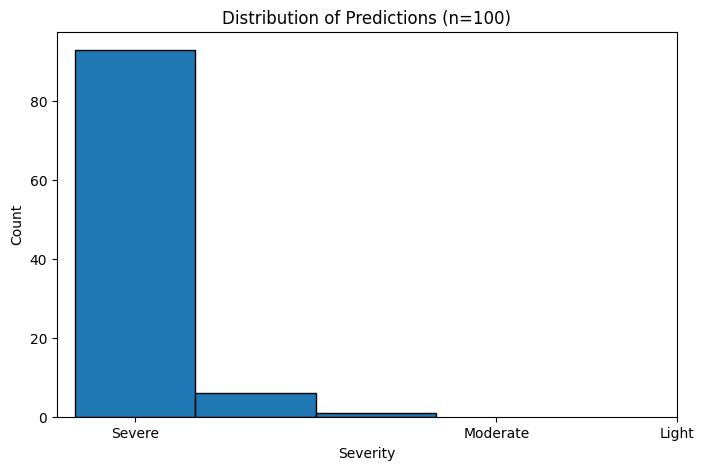

In [33]:
import matplotlib.pyplot as plt

# Function to predict multiple times and collect results
def predict_multiple_times(num_predictions=100):
    predictions = []

    for _ in range(num_predictions):
        random_input = generate_random_input()
        predicted_severity = predict_severity(random_input)
        predictions.append(predicted_severity)

    # Plot the distribution of predictions
    plt.figure(figsize=(8, 5))
    plt.hist(predictions, bins=3, edgecolor='black', align='left')
    plt.title(f'Distribution of Predictions (n={num_predictions})')
    plt.xlabel('Severity')
    plt.ylabel('Count')
    plt.xticks(['Light', 'Moderate', 'Severe'])
    plt.show()

# Run and visualize the prediction distribution for 100 iterations
predict_multiple_times(100)


In [34]:
# Adjust class weights during model training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X, y)


RandomForestClassifier(class_weight='balanced', random_state=42)

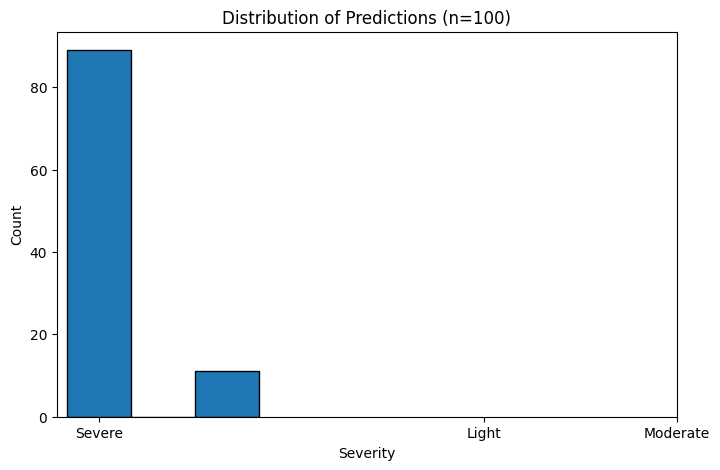

In [35]:
import matplotlib.pyplot as plt

# Function to predict multiple times and collect results
def predict_multiple_times(num_predictions=100):
    predictions = []

    for _ in range(num_predictions):
        random_input = generate_random_input()
        predicted_severity = predict_severity(random_input)
        predictions.append(predicted_severity)

    # Plot the distribution of predictions
    plt.figure(figsize=(8, 5))
    plt.hist(predictions, bins=3, edgecolor='black', align='left')
    plt.title(f'Distribution of Predictions (n={num_predictions})')
    plt.xlabel('Severity')
    plt.ylabel('Count')
    plt.xticks(['Light', 'Moderate', 'Severe'])
    plt.show()

# Run and visualize the prediction distribution for 100 iterations
predict_multiple_times(100)


In [37]:
# Create a dictionary of class weights manually (you can adjust the values as needed)
class_weights = {1: 10, 2: 1, 3: 2, 4: 5}  # Adjust these weights according to the frequency of each class

# Train the model with manual class weights
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)
rf_model.fit(X, y)


RandomForestClassifier(class_weight={1: 10, 2: 1, 3: 2, 4: 5}, random_state=42)

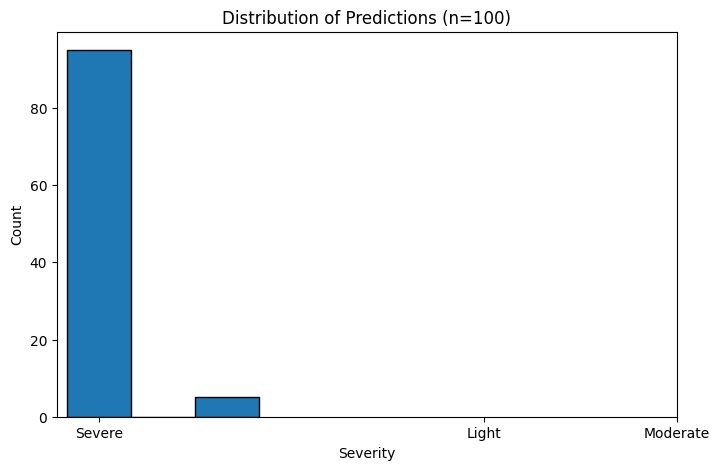

In [38]:
import matplotlib.pyplot as plt

# Function to predict multiple times and collect results
def predict_multiple_times(num_predictions=100):
    predictions = []

    for _ in range(num_predictions):
        random_input = generate_random_input()
        predicted_severity = predict_severity(random_input)
        predictions.append(predicted_severity)

    # Plot the distribution of predictions
    plt.figure(figsize=(8, 5))
    plt.hist(predictions, bins=3, edgecolor='black', align='left')
    plt.title(f'Distribution of Predictions (n={num_predictions})')
    plt.xlabel('Severity')
    plt.ylabel('Count')
    plt.xticks(['Light', 'Moderate', 'Severe'])
    plt.show()

# Run and visualize the prediction distribution for 100 iterations
predict_multiple_times(100)


In [39]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Use the BalancedRandomForestClassifier
rf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


BalancedRandomForestClassifier(random_state=42)

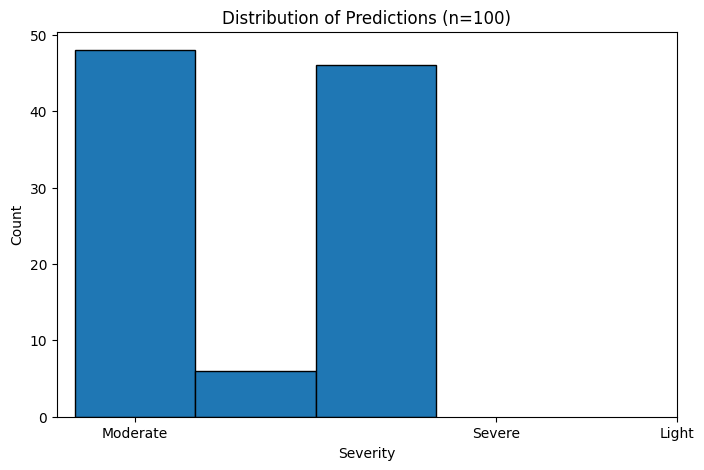

In [40]:
import matplotlib.pyplot as plt

# Function to predict multiple times and collect results
def predict_multiple_times(num_predictions=100):
    predictions = []

    for _ in range(num_predictions):
        random_input = generate_random_input()
        predicted_severity = predict_severity(random_input)
        predictions.append(predicted_severity)

    # Plot the distribution of predictions
    plt.figure(figsize=(8, 5))
    plt.hist(predictions, bins=3, edgecolor='black', align='left')
    plt.title(f'Distribution of Predictions (n={num_predictions})')
    plt.xlabel('Severity')
    plt.ylabel('Count')
    plt.xticks(['Light', 'Moderate', 'Severe'])
    plt.show()

# Run and visualize the prediction distribution for 100 iterations
predict_multiple_times(100)


In [42]:
import random
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Sample Model Training Data (Balanced for Severity classes)
data = {
    'Temperature(F)': [85, 92, 70, 60, 50, 105, 80],
    'Wind_Chill(F)': [75, 85, 68, 59, 40, 110, 78],
    'Humidity(%)': [45, 50, 60, 65, 80, 55, 50],
    'Pressure(in)': [30.0, 29.8, 30.5, 30.2, 29.9, 30.1, 30.3],
    'Visibility(mi)': [10, 5, 8, 12, 20, 2, 7],
    'Wind_Speed(mph)': [15, 20, 12, 10, 25, 30, 10],
    'Precipitation(in)': [0.1, 0.0, 0.2, 0.0, 0.3, 0.1, 0.2],
    'Wind_Direction_N': [0, 0, 1, 0, 0, 0, 1],  # Example with binary wind directions
    'Wind_Direction_S': [0, 1, 0, 0, 1, 0, 0],
    'Weather_Condition_Clear': [1, 0, 0, 1, 0, 0, 1],  # Example with binary weather conditions
    'Weather_Condition_Rain': [0, 1, 0, 0, 1, 0, 0],
    'Severity': [3, 4, 3, 4, 3, 4, 2]  # Severe (3), Light (4), Moderate (2)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features and Target
X = df.drop('Severity', axis=1)
y = df['Severity']

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Function to generate random input
def generate_random_input():
    # Generate random values for the input, based on your provided binary subcategories
    random_input = {
        'Temperature(F)': random.uniform(-30, 110),
        'Wind_Chill(F)': random.uniform(-50, 100),
        'Humidity(%)': random.randint(0, 100),
        'Pressure(in)': random.uniform(28, 31),
        'Visibility(mi)': random.uniform(1, 20),
        'Wind_Speed(mph)': random.uniform(0, 60),
        'Precipitation(in)': random.uniform(0, 1),
        'Wind_Direction_N': random.choice([0, 1]),
        'Wind_Direction_S': random.choice([0, 1]),
        'Weather_Condition_Clear': random.choice([0, 1]),
        'Weather_Condition_Rain': random.choice([0, 1])
    }
    return random_input

# Function to preprocess input data (convert it to DataFrame format)
def preprocess_input(input_data):
    input_df = pd.DataFrame([input_data])
    return input_df

# Function to predict severity
def predict_severity(input_data):
    preprocessed_data = preprocess_input(input_data)
    prediction = rf_model.predict(preprocessed_data)
    severity_map = {1: 'Light', 2: 'Moderate', 3: 'Severe', 4: 'Unknown'}
    severity = severity_map.get(prediction[0], 'Unknown')
    return severity

# Test the prediction multiple times
for _ in range(5):
    random_input = generate_random_input()
    predicted_severity = predict_severity(random_input)
    print(f"Random Input: {random_input}")
    print(f"Predicted Severity: {predicted_severity}\n")


Random Input: {'Temperature(F)': 104.84486134142338, 'Wind_Chill(F)': 69.47591844028437, 'Humidity(%)': 61, 'Pressure(in)': 30.212747230999483, 'Visibility(mi)': 6.822951455577455, 'Wind_Speed(mph)': 19.127540376535098, 'Precipitation(in)': 0.04400518826939559, 'Wind_Direction_N': 1, 'Wind_Direction_S': 1, 'Weather_Condition_Clear': 0, 'Weather_Condition_Rain': 1}
Predicted Severity: Unknown

Random Input: {'Temperature(F)': 50.21716869886731, 'Wind_Chill(F)': 91.67753186130369, 'Humidity(%)': 45, 'Pressure(in)': 30.785726326480884, 'Visibility(mi)': 2.0499116565998703, 'Wind_Speed(mph)': 10.672492730730527, 'Precipitation(in)': 0.7562376882104993, 'Wind_Direction_N': 1, 'Wind_Direction_S': 0, 'Weather_Condition_Clear': 0, 'Weather_Condition_Rain': 0}
Predicted Severity: Moderate

Random Input: {'Temperature(F)': -21.51393302097126, 'Wind_Chill(F)': 23.72142836273565, 'Humidity(%)': 68, 'Pressure(in)': 29.779087765144403, 'Visibility(mi)': 7.090217580392736, 'Wind_Speed(mph)': 31.53752